In [1]:
import pandas as pd

file_path = r"D:\Rishika Internship\snapdeal_products_clean_data.csv"

df = pd.read_csv(file_path, encoding="latin1")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Drop rows missing the three core metrics
df = df.dropna(subset=['Price', 'Discount', 'Rating (detail)'])

# ensure numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Discount'] = pd.to_numeric(df['Discount'], errors='coerce')
df['Rating'] = pd.to_numeric(df['Rating (detail)'], errors='coerce')

df = df.dropna(subset=['Price','Discount','Rating (detail)'])

In [4]:
avg_price = df['Price'].mean()
avg_discount = df['Discount'].mean()
avg_rating = df['Rating (detail)'].mean()

print(f"Avg Price = {avg_price:.2f}")
print(f"Avg Discount = {avg_discount:.2f}%")
print(f"Avg Rating = {avg_rating:.2f}")


Avg Price = 400.11
Avg Discount = 69.49%
Avg Rating = 3.14


In [13]:
# if you have a 'Subcategory' column:
agg = df.groupby('Subcategory').agg(
    AvgPrice = ('Price','mean'),
    AvgDiscount = ('Discount','mean'),
    AvgRating = ('Rating (detail)','mean'),
    Count = ('Rating (detail)','count')
).reset_index()

# sort for consistent visuals
agg_sorted_price = agg.sort_values('AvgPrice', ascending=False)
agg_sorted_discount = agg.sort_values('AvgDiscount', ascending=False)


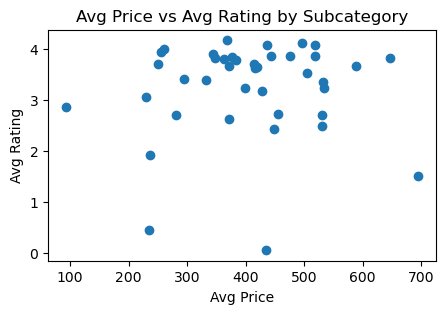

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# make a small summary table first
agg = df.groupby('Subcategory').agg(
    AvgPrice=('Price','mean'),
    AvgRating=('Rating (detail)','mean')
).reset_index()

plt.figure(figsize=(5,3))
plt.scatter(agg['AvgPrice'], agg['AvgRating'])
plt.xlabel('Avg Price')
plt.ylabel('Avg Rating')
plt.title('Avg Price vs Avg Rating by Subcategory')
plt.show()


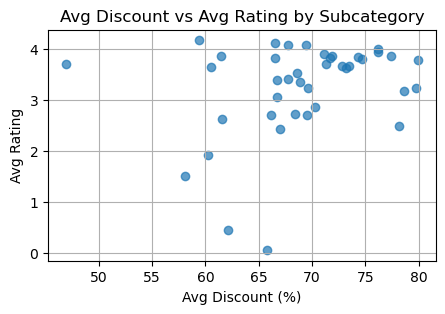

In [16]:
plt.figure(figsize=(5,3))
plt.scatter(agg['AvgDiscount'], agg['AvgRating'], alpha=0.7)
plt.xlabel("Avg Discount (%)")
plt.ylabel("Avg Rating")
plt.title("Avg Discount vs Avg Rating by Subcategory")
plt.grid(True)
plt.show()


In [38]:
import pandas as pd

bins = [0,10,20,30,40,50,60,70,80,100]
labels = ['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-100']

df['DiscountBin'] = pd.cut(df['Discount'], bins=bins, labels=labels, include_lowest=True)
bin_avg = df.groupby('DiscountBin', observed=True)['Rating'].mean().reindex(labels).reset_index()
bin_avg = df.groupby('DiscountBin', observed=True)['Rating'].mean().reset_index()



C:\Users\Admin\AppData\Local\Temp\ipykernel_11672\586672265.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = df.groupby('DiscountBin')['Rating'].mean().reset_index()


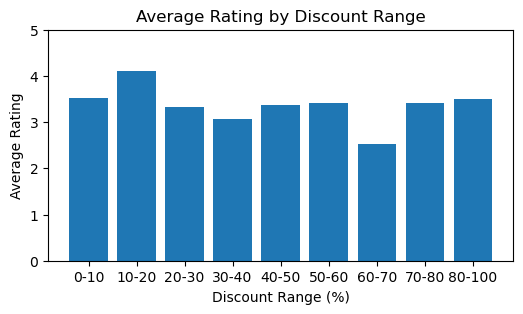

In [39]:
import matplotlib.pyplot as plt

bin_avg = df.groupby('DiscountBin')['Rating'].mean().reset_index()

plt.figure(figsize=(6,3))
plt.bar(bin_avg['DiscountBin'].astype(str), bin_avg['Rating'])
plt.xlabel("Discount Range (%)")
plt.ylabel("Average Rating")
plt.title("Average Rating by Discount Range")
plt.ylim(0,5)
plt.show()


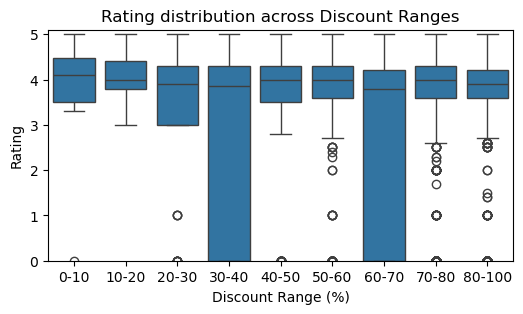

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,3))
sns.boxplot(x='DiscountBin', y='Rating', data=df)
plt.xlabel("Discount Range (%)")
plt.ylabel("Rating")
plt.title("Rating distribution across Discount Ranges")
plt.ylim(0,5.1)
plt.show()
